# PyTurbo-Aero 2D Design Tutorial
In this tutorial you will learn how to construct a 2D Airfoil beginning with a camberline. The pressure and suction sides are then defined from the camberline by spacing control points perpendicularly.


## Building a camberline
A camberline in an airfoil is the line separating the pressure side from the suction side. The reason why a side is called pressure and suction is due to the velocity of the flow moving around each side. Suction side has some concavity to it like hill or mountain. This causes the velocity of the gasses to accelerate as it passes around the suction side. Lower velocity means lower static pressure, hence suction. The pressure side has the opposite effect. The gasses passing over the pressure side move slower and this causes the static pressure to rise. The difference in pressure creates a lift force. In turbomachinery, this lift force is used to rotate the turbine or compressor.

Example of a turbomachinery airfoil:
![Airfoil](https://scholar.lib.vt.edu/ejournals/JOTS/v37/v37n1/images/lowe1.jpeg)

## Installing PyTurbo-Aero
Run the code below to pip install the latest version of pyturbo-aero

In [2]:
!pip install pyturbo-aero

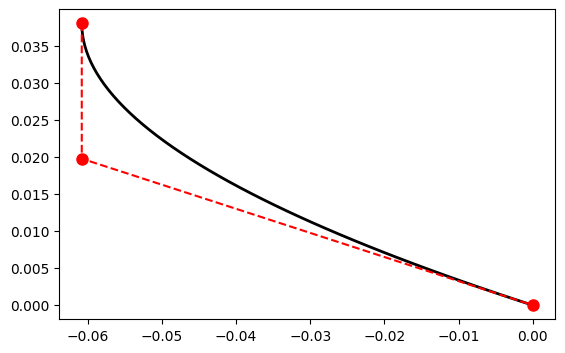

In [1]:
# Construction of camber line
import numpy as np
from pyturbo.aero import Airfoil2D
from pyturbo.helper import exp_ratio

stator_hub = Airfoil2D(alpha1=0,alpha2=72,axial_chord=0.038,stagger=58) # This creates the camberline
stator_hub.plot_camber()


## Building Suction and Pressure side and the Leading edge
Leading edge is easily constructed using a single line of code. The pressure side is built by providing control point heights from the camber line. 1.2 refers to the expansion ratio. You can see an example of what the expansion ratio does by calling exp_ratio function below.
Try changing some parameters to see what kind of geometries you can get.

In [2]:
from pyturbo.helper import exp_ratio
# Expansion ratio
x = exp_ratio(1.2,5)
dx = np.diff(x)
print(x) # position
print(dx) # difference
print(dx[1]/dx[0]) # this is the expansion ratio

[0.         0.18628912 0.40983607 0.6780924  1.        ]
[0.18628912 0.22354694 0.26825633 0.3219076 ]
1.2


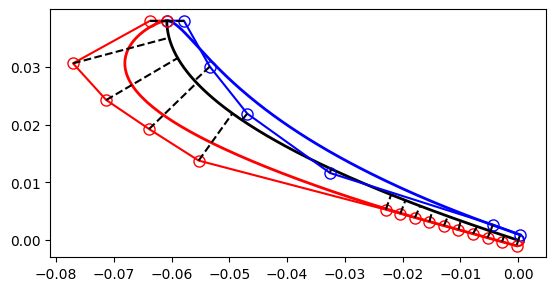

In [ ]:
# Building Leading Edge
stator_hub.add_le_thickness(0.04)
# Building the Pressure side
ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses
stator_hub.add_ps_thickness(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_hub.add_ss_thickness(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_hub.match_le_thickness()
stator_hub.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)

stator_hub.add_ss_flow_guidance_2(10)
stator_hub.plot2D()

### Bonus: Pitch to Chord Ratio
Pitch to chord refers to ratio of gap between the blades relative to their length. Smaller the gap \(lower s/c ratio\) will keep the airflow passing between the blades from separating which can help blades that have a lot of turning, but this leads to increase weight and results in less massflow. It is ideal to keep this ratio between design limits for example 0.7 to 0.95 for stators and 0.7 and 0.85 for rotors.

Visualizing the spacing of your design by specifying a pitch to chord ratio. </br>
Example:</br>
<img src="https://github.com/nasa/pyturbo-aero/blob/main/tutorials/_static/pitch_to_chord.jpg?raw=1" width="500px">

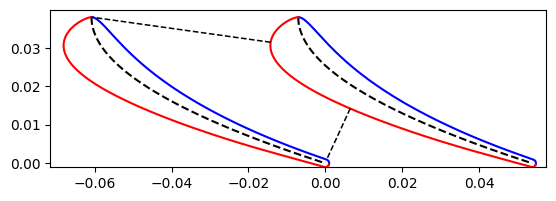

In [4]:
stator_hub.plot2D_channel(0.75)
# The lines connecting the blade show the minimum distance at the inlet and outlet. The outlet distance is called the throat area.
# If the pressure ratio between upstream total and downstream static (P0/P) is > 1.89 then you can use the choke flow equation to compute the massflow at the throat (M = 1)
# https://www.grc.nasa.gov/www/k-12/airplane/mflchk.html

## Plotting the 2nd derivative
Even with a favorable pressure gradient the flow can separate if there is too much turning. The second derivative can be an indicator of separation. You can think of biking or driving over a speed bump. Going too fast you can get air. This is sort of what happens in a Turbine and Compressor. Air can separate from the surface causing a separation bubble with a recirculation region. We want to minimize this in design.

The points along the suction and pressure side are not spaced equally interms of x or y but they do maintain constant distance between the points. This algorithm was used to compute the second derivative https://mathformeremortals.wordpress.com/2013/01/12/a-numerical-second-derivative-from-three-points/

/Users/pjuangph/Documents/GitHub/pyturbo-aero/pyturbo/helper/bezier.py:358: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  temp = minimize_scalar(f2,bounds=(t_start,t_end),method="bounded",tol=1e-6,args=(t_start))


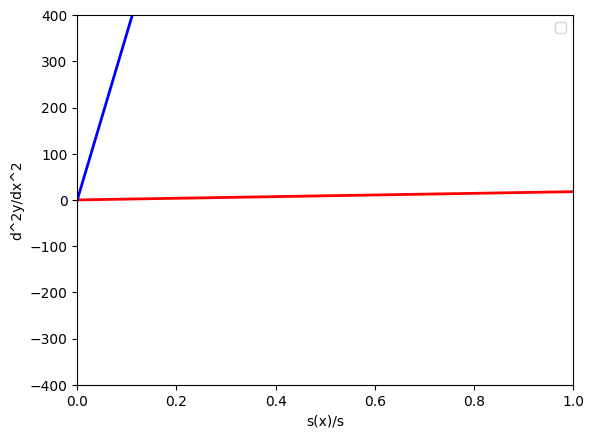

In [5]:
stator_hub.plot_derivative2()